# Auto credit card approval - case study description

<p>This case study focuses on building an automatic credit card approval predictor using machine learning. The Credit Approval Data Set from the <a href="http://archive.ics.uci.edu/ml/datasets/credit+approval"> UCI Machine Learning Repository </a>is used as an example dataset to demonstrate the methodology. Although the features labels are sanitized to maintain anonymity, expert opinions suggest that the feature labels may be: <code>Gender, Age, Debt, Married status, BankCustomer, EducationLevel, Ethnicity, YearsEmployed, PriorDefault, Employed, CreditScore, DriversLicense, Citizen, ZipCode, Income</code> and <code> ApprovalStatus.</code></p>

<p>Credit card approval is a perfect case study for applied machine learning since the application approval process can be easily framed as a classification problem. The underlying pattern that differentiates between trustworthy customers and unreliable customers can be ascertained through the customer's credit and personal details. The conventional system for approvals were subjective and based on the bank manager's experience. Using machine learning, this subjective judgement can be supplemented with quantitave metrics that can lead to faster and more accurate approval processes. </p>

<p> This analysis will involve data pre-processing and cleaning followed by an exploratory analysis. Pre-processing is reqired to deal with the missing values and prepping the dataset for use in machine learning libraries. After some exploratory analysis, we'll build a pipeline that will test several machine learning models and their predictors for te credit card applications.</p>  


<p><sub>Sources:</sub><br>    
<sub>Data: Credit Approval Data Set, UCI Machine Learning Repository</sub><br>
<sub>Project: Sayak Paul, Predicting Credit Card Approvals, Datacamp </sub></p>


In [45]:
#from IPython.core.debugger import set_trace
#Original dataset
import pandas as pd
import numpy as np

df = pd.read_csv('../dat/cc_approvals.data',header=None,na_values='?')
df.columns = ['Gender', 'Age', 'Debt', 'Married_status', 'BankCustomer', 'EducationLevel', 'Ethnicity', 'YearsEmployed', 'PriorDefault', 'Employed', 'CreditScore', 'DriversLicense', 'Citizen', 'ZipCode', 'Income' ,  'ApprovalStatus']
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 690 entries, 0 to 689
Data columns (total 16 columns):
0     678 non-null object
1     678 non-null float64
2     690 non-null float64
3     684 non-null object
4     684 non-null object
5     681 non-null object
6     681 non-null object
7     690 non-null float64
8     690 non-null object
9     690 non-null object
10    690 non-null int64
11    690 non-null object
12    690 non-null object
13    677 non-null float64
14    690 non-null int64
15    690 non-null object
dtypes: float64(4), int64(2), object(10)
memory usage: 86.4+ KB


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1,f,g,202.0,0,+
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,43.0,560,+
2,a,24.50,0.500,u,g,q,h,1.50,t,f,0,f,g,280.0,824,+
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,100.0,3,+
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,120.0,0,+


## Data cleaning and pre-processing
As can be seen, the dataset requires some cleaning before it can be used for any exploratory analysis. 

In [290]:
def convert_cat_cols(df,cat_var_limit=10,verbose=False):
    """
    Converts columns with a small amount of unique values that are of
    type Object into categorical variables
    """
    temp_var = df.apply(lambda x: len(x.value_counts())<cat_var_limit)
    temp_var2 = df.apply(lambda x: x.value_counts().index.dtype == 'O')
    df[temp_var[temp_var2].index] = df[temp_var[temp_var2].index].astype('category')
    if verbose:
        print(df[temp_var[temp_var2].index].describe())
    return df

def impute_most_freq(df):
    """
    Imputes the most frequent value in place of NaN's
    """
    temp_var = df.apply(lambda x: x.value_counts().index[0])
    return df.fillna(temp_var)


df = pd.read_csv('../dat/cc_approvals.data',header=None,na_values='?')
df.columns = ['Gender', 'Age', 'Debt', 'Married_status', 'BankCustomer', 'EducationLevel', 'Ethnicity', 'YearsEmployed', 'PriorDefault', 'Employed', 'CreditScore', 'DriversLicense', 'Citizen', 'ZipCode', 'Income' ,  'ApprovalStatus']
df = convert_cat_cols(df,10).fillna(df.median())
df = impute_most_freq(df)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 690 entries, 0 to 689
Data columns (total 16 columns):
Gender            690 non-null category
Age               690 non-null float64
Debt              690 non-null float64
Married_status    690 non-null category
BankCustomer      690 non-null category
EducationLevel    690 non-null category
Ethnicity         690 non-null category
YearsEmployed     690 non-null float64
PriorDefault      690 non-null category
Employed          690 non-null category
CreditScore       690 non-null int64
DriversLicense    690 non-null category
Citizen           690 non-null category
ZipCode           690 non-null float64
Income            690 non-null int64
ApprovalStatus    690 non-null category
dtypes: category(10), float64(4), int64(2)
memory usage: 41.1 KB


All data cleaning is done. Next step is to perform preprocessing of the dataset for insertion into the SciKit library functions which require numeric values. We'll convert our dataset into a binary integer representation using pd.get_dummies as well as a 0 - n_class-1 integer representation using the Scikit Transformer LabelEncoder

In [291]:
from sklearn.preprocessing import LabelEncoder
def convert_str_int_labels(df):
    """
    Converts columns with strings (class labels) into integer representation
    """
    for col in df.columns:
        le = LabelEncoder()
        df.loc[:,col]=le.fit_transform(df.loc[:,col])
    return df

df_bin = pd.get_dummies(df,drop_first=True)
df.loc[:,df.columns[df.dtypes=='category']]=\
convert_str_int_labels(df.loc[:,df.columns[df.dtypes=='category']])

print(df_bin.head())
df.head()


#for i in df.columns:
#    print(df[i].value_counts(dropna=False))
#    print('\n')
#df.head()

     Age   Debt  YearsEmployed  CreditScore  ZipCode  Income  Gender_b  \
0  30.83  0.000           1.25            1    202.0       0         1   
1  58.67  4.460           3.04            6     43.0     560         0   
2  24.50  0.500           1.50            0    280.0     824         0   
3  27.83  1.540           3.75            5    100.0       3         1   
4  20.17  5.625           1.71            0    120.0       0         1   

   Married_status_u  Married_status_y  BankCustomer_gg  ...  Ethnicity_n  \
0                 1                 0                0  ...            0   
1                 1                 0                0  ...            0   
2                 1                 0                0  ...            0   
3                 1                 0                0  ...            0   
4                 1                 0                0  ...            0   

   Ethnicity_o  Ethnicity_v  Ethnicity_z  PriorDefault_t  Employed_t  \
0            0            

,Gender,Age,Debt,Married_status,BankCustomer,EducationLevel,Ethnicity,YearsEmployed,PriorDefault,Employed,CreditScore,DriversLicense,Citizen,ZipCode,Income,ApprovalStatus
0,1,30.83,0.000,1,0,12,7,1.25,1,1,1,0,0,202.0,0,0
1,0,58.67,4.460,1,0,10,3,3.04,1,1,6,0,0,43.0,560,0
2,0,24.50,0.500,1,0,10,3,1.50,1,0,0,0,0,280.0,824,0
3,1,27.83,1.540,1,0,12,7,3.75,1,1,5,1,0,100.0,3,0
4,1,20.17,5.625,1,0,12,7,1.71,1,0,0,0,2,120.0,0,0


## Splitting into train and test sets with auto feature selection
<p>With all numeric data, the next data-prep step will be to split the data into a training set and testing set. Ideally, no information from the test data should be used to scale the training data or should be used to direct the training process of a machine learning model. Hence, we first split the data and then apply the scaling.</p>

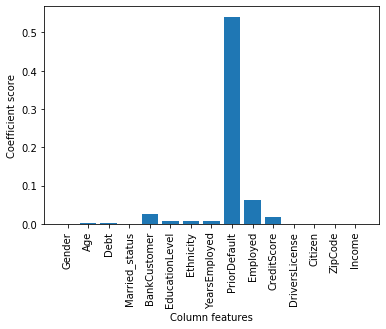

In [292]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso
import matplotlib.pyplot as plt
from IPython.core.debugger import set_trace

def feat_select(df,test_size_var=0.3,alpha_val=0.08,random_state_var=21,use_feat_select=True,plot=True):
    """
    Performs feature selection on a dataframe with a single target variable and n features. 
    Test train split is also performed and only splits of selected features are returned.
    Feature selection performed using LASSO weight shrinking
    """
    x_train, x_test, y_train, y_test = train_test_split(df.iloc[:,:-1], df.iloc[:,-1]\
                                                        ,test_size=test_size_var, random_state=random_state_var\
                                                        ,stratify=df.iloc[:,-1])
    if use_feat_select:
        param_grid = {'alpha': np.linspace(0.01,0.02,20)}
        lasso_gcv = GridSearchCV(Lasso(normalize=False),param_grid,cv=5,n_jobs=-1,iid=True)
        lasso_coeffs = lasso_gcv.fit(x_train, y_train).best_estimator_.coef_
        if plot:
            plt.bar(x=range(len(df.columns[:-1])),height=np.abs(lasso_coeffs)\
                    ,tick_label=df.columns[:-1].values,)
            plt.xlabel('Column features')
            plt.ylabel('Coefficient score')
            plt.xticks(rotation=90)
            plt.show()
        select_feats = df.columns[:-1][np.abs(lasso_coeffs) > 0].values
        #set_trace()
        x_train = x_train.loc[:,select_feats]
        x_test = x_test.loc[:,select_feats]
    return x_train, x_test, y_train, y_test


x_train, x_test, y_train, y_test = feat_select(df,use_feat_select=True,plot=True)

